# ST433 Computational Methods in Finance and Insurance - Summer Project

**Candidate number: 38388**

In [1]:
# Loading required libraries
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
# Constructing Generator with fixed seed for reproducibility purposes 
rng = np.random.default_rng(12345)

## Problem 1

Consider the problem in which we would like to generate a sample from a distribution function $F$. Let $X$ be a random variable whose cumulative distribution function is given by

\begin{equation*}
F(x)=\begin{cases}
          0, \quad &\text{if} \, x < 1 \\ 
          x - \frac{3}{4}, \quad &\text{if} \, 1 \leq x < \frac{3}{2} \quad (1) \\
          1, \quad &\text{if} \, x \geq \frac{3}{2} \\
     \end{cases}
\end{equation*}

One way to generate a sample from $F$ is to use the inverse transform method which is based on the following lemma: if $U \sim U(0,1)$, then the random variable $F^{-1}(u)$ has cumulative distribution function $F$. Therefore to obtain a sample from $F$, we can first generate a sample $\{U_{1}, U_{2}, \dots,\ U_{n}\}$ from the Uniform distribution, where $U_{i}\stackrel{iid}{\sim} U(0,1)$, and then plug those values into the genralized inverse $F^{-1}$ to obtain a sample $\{X_{1}, X_{2}, \dots,\ X_{n}\}$ which has the same distribution as $X$.

### I) Deriving the generalized inverse function of $F$

Recall that the generalized inverse function of $F$ is defined by

\begin{equation*}
F^{-1}(u)= \inf{ \{ x \in \mathbb{R} | F(x) \geq u \}} \quad \text{ for } u \in \left(0,1\right)
\end{equation*}

For $x \in \left[1, \frac{3}{2} \right) $, we can solve the following equation for $x$

\begin{equation} F(x) = u \Rightarrow x - \frac{3}{4} = u \Rightarrow x = \frac{3}{4} + u
\end{equation}

Since $1 \leq x < \frac{3}{2}$, we require $1 \leq \frac{3}{4} + u < \frac{3}{2} \Leftrightarrow \frac{1}{4} \leq u < \frac{3}{4}$. 

However, $F(F^{-1}(u)) \neq u $ for some $u \in \left(0,1\right)$. 

In particular, for $u \in \left(0,\frac{1}{4}\right)$, we can see that the smallest $x$ such that $F(x) \geq u$ corresponds to $x = 1$. Therefore, $F(F^{-1}(u)) = F(1) = \frac{1}{4} \geq u$ for $u \in \left(0,\frac{1}{4}\right)$.

Finally, for $u \in \left[\frac{3}{4},1\right)$, we can see that the smallest $x$ such that $F(x) \geq u$ corresponds to $x = \frac{3}{2}$. Hence, $F(F^{-1}(u)) = F(\frac{3}{2}) = 1 \geq u$ for $u \in \left[\frac{3}{4},1\right)$.

Therefore, the generalized inverse function of $F$ is given by

\begin{equation*}
F^{-1}(u)=\begin{cases}
          1, \quad &\text{if} \, 0 < u < \frac{1}{4} \\ 
          u + \frac{3}{4}, \quad &\text{if} \, \frac{1}{4} \leq u < \frac{3}{4} \quad (2) \\
          \frac{3}{2}, \quad &\text{if} \, \frac{3}{4} \leq u < 1 \\
     \end{cases}
\end{equation*}

We know that $F^{-1}$ has to be left continuous, in order to be a valid inverse function for $F$. Let's check this fact. At $u = 0.25$, we have $\lim_{u\to 0.25^{-}}F^{-1}(u) = 1$ which is equal to $F^{-1}(0.25) = 0.25+0.75 = 1$.
And at $u=0.75$, we have $\lim_{u\to 0.75^{-}}F^{-1}(u) = 0.75 + 0.75 = 1.5$ which is equal to $F^{-1}(0.75) = 1.5$. Hence, we can use an i.i.d sample $\{U_{1}, U_{2}, \dots,\ U_{n}\}$ from $U(0,1)$, and set $F^{-1}(U)$ which is given in (2) to obtain $\{F^{-1}(U_{1}), F^{-1}(U_{2}), \dots,\ F^{-1}(U_{n})\}$ which corresponds to a sample from the required distribution given in (1).

### II) Implementation of the technique

Let's implement the inverse transform method to obtain a sample from $F$ of size $10000$ and plot its histogram.

In [3]:
def cdf_inverse(u):
    """Returns inverse function of F evaluated at u where u in (0,1)."""
    f = np.piecewise(u, [u < 0.25, ((u >= 0.25) & (u < 0.75)), u >= 0.75], [1, lambda u : u + 0.75 , 1.5])
    return f

In [4]:
def sample_F(rng, samplesize):
    """Function that returns an array containing a sample from the distribution of F for a given random generator."""
    myuniforms = rng.random(samplesize) # generate sample from U(0,1)
    mysample = cdf_inverse(myuniforms)  # obtain sample by plugging uniform sample into inverse of F
    return mysample

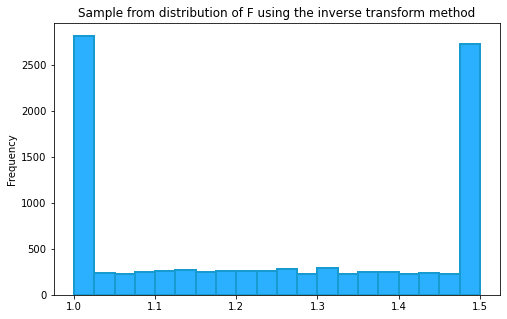

In [5]:
# Plotting histogram of generated sample  
samplesize = 10000 
mysample = sample_F(rng, samplesize)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5)) # create plot figure
ax.hist(mysample, bins=20, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=2) # plotting histogram
ax.set_title("Sample from distribution of F using the inverse transform method") # setting title
ax.set_ylabel("Frequency") # labelling y-axis 
plt.show()

To verify the correctness of our implementation, we can try to see how close our emprical quantiles derived from $F$ in (1) are to the theoritical ones. For this purpose, we will consider the first quartile, the median and the 70th percentile. The measures are given by

$
\begin{equation*} 
F(Q_{25}) = 0.25 \Rightarrow Q_{25} = 1 \\
F(Q_{50}) = 0.5 \Rightarrow Q_{50} = 1.25 \\
F(Q_{70}) = 0.70 \Rightarrow Q_{70} = 1.45 \\
\end{equation*}
$

where $Q_{25}$, $Q_{50}$, $Q_{70}$ represent respectively the first quartile, the median and the $70^{th}$ percentile.

In [6]:
# Comparing the theoritical quantiles with the obtained quantiles
Q_25 = round(np.quantile(mysample, 0.25), 4)
median = round(np.quantile(mysample, 0.5), 4)
Q_70 = round(np.quantile(mysample, 0.7), 4)

print("Empirical first quartile: {}".format(Q_25))
print("Empirical median: {}".format(median))
print("70% empirical percentile: {}".format(Q_70))

Empirical first quartile: 1.0
Empirical median: 1.2428
70% empirical percentile: 1.4446


Hence, we can see that our empirical quantiles are very to the theoritical ones, and we can conclude that our implementation seems to be correct.

### III) Antithetic pair

For estimation purposes, it is of interest to find a random variable $Y$ such that $(X,Y)$ is an antithetic pair with cov$(X,Y) < 0$ and $X$ having cdf given by (1). This method can be particularly useful when $(X,Y)$ are negatively correlated, since it reduces the computational effort to generate a sample $(X_{i}, Y_{i})$ compared to generating a sample $Y_{i}$. 

Since we generated a sample from $F$ using the inverse transform method, we can define the antithetic pair $(F^{-1}(U),F^{-1}(1-U))$ where $U \sim U(0,1)$. Indeed, we know from lemma 48 that:
if $h : \left[0,1\right] \rightarrow \mathbb{R}$ is a monotonic function, then for $U \sim U(0,1)$, we have
cov$(h(U), h(1-U)) \leq 0$.

We can verify that indeed cov$(X, Y) < 0$ where  $X = F^{-1}(U)$, $Y = F^{-1}(1-U)$ and $U \sim U(0,1)$ by using the following code.

In [7]:
def f_sample_ap(rng, samplesize):
    """Function that returns an array containining sample from distribution of F using inverse transform method 
    based on antithetic pairs. Also returns the sample covariance between the antithetic pairs."""
    myuniforms = rng.random(samplesize) # generating iid sample U(0,1)
    first_pair = cdf_inverse(myuniforms) 
    second_pair = cdf_inverse(1-myuniforms) # generating antithetic pair 1-U
    mysample = np.concatenate((first_pair, second_pair)) # concatenating both samples
    sample_cov = np.cov(first_pair, second_pair)[0][1] # sample covariance between X and Y
    return mysample, sample_cov

In [8]:
sample_anti = f_sample_ap(rng, samplesize)
print("The sample covariance between X and Y is:", round(sample_anti[1], 4))

The sample covariance between X and Y is: -0.0418


The obtained sample covariance between $X$ and $Y$ is indeed negative, however, its value is very close to 0. We can plot the histogram of the generated sample using this antithetic pair.

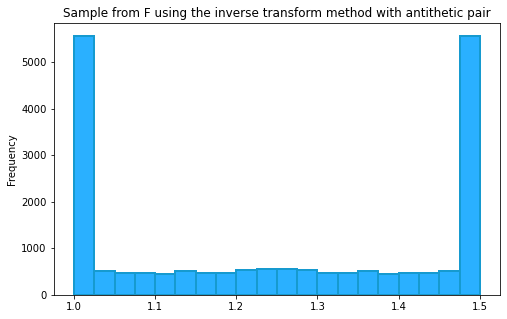

In [9]:
# Plotting histogram of generated sample using antithetic pair
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
ax.hist(sample_anti[0], bins=20, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=2)
ax.set_title("Sample from F using the inverse transform method with antithetic pair")
ax.set_ylabel("Frequency")
plt.show()

As we can see, by using the antithetic pair $(X,Y)$, we were able to generate a larger sample from $F$ without actually increasing the number of generated sample from $U(0,1)$.

Moreover, to ensure that the covariance between $X$ and $Y$ is indeed negative, we can try to obtain 1000 sample covariance's measures between and $X$ and $Y$ and check if we still obtain only negative values.

In [10]:
def cov_check(rng, samplesize, rep):
    """Function that returns an array of sample covariance between X and Y. The rep (int) argument controls the number
    of required simulated covariance's measures."""
    mycov = np.zeros(rep) # vector that will contain cov measures 
    for i in range(rep):
        tmp = f_sample_ap(rng, samplesize)
        mycov[i] = tmp[1]
    return mycov

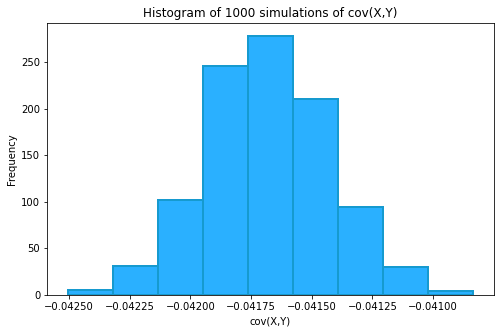

Highest sample covariance obtained: -0.0408


In [11]:
# Plotting 1000 simulations of sample covariances between X and Y
mycov = cov_check(rng, samplesize, rep=1000) 

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,5))
ax.hist(mycov, bins=9, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=2)
ax.set_title("Histogram of 1000 simulations of cov(X,Y)")
ax.set_ylabel("Frequency")
ax.set_xlabel("cov(X,Y)")
plt.show()

max_cov = round(np.amax(mycov),4) # obtaining highest sample covariance
print("Highest sample covariance obtained: {}".format(max_cov))

As we can see, for 1000 simulations of cov$(X,Y)$, the highest possible obtained sample covariance is $-0.408$ which is still negative. Moreover, we can notice that the histogram has a normal shape: this comes directly from the Central Limit Theorem. Hence, we can derive an asymptotic 99% confidence interval for cov$(X,Y)$ using the below code.

In [12]:
epsilon = 0.01 # setting confidence level
mean = np.mean(mycov) # sample mean 
std = np.std(mycov, ddof = 1) # consistent estimator of sample standard deviation of cov(X,Y)
aepsilon = norm.ppf(1.0 - epsilon*0.5) # inverse CDF of N(0,1)
n = len(mycov) # sample size

# Deriving upper and lower bound using standard asymptotic formula
ci_left = round(mean - aepsilon*std/np.sqrt(n), 6)
ci_right = round(mean + aepsilon*std/np.sqrt(n), 6)

print("A 99% confidence interval ({},{})".format(ci_left,ci_right))

A 99% confidence interval (-0.041703,-0.041662)


Therefore, with a 99% confidence level, the interval $[-0.041703,-0.041662]$ contains the true value of cov($X,Y$), where we can clearly that the interval's upper bound is still negative. Therefore, we are 99% confident that the covariance between X and Y is negative, making $(F^{-1}(U), F^{-1}(1-U))$ a valid antithetic pair where $U \sim U(0,1)$ and F defined in (1).

# Problem 2

### I) Exactness of a pseudocode for simulating a Brownian motion path

Let $h > 0$, we consider the problem of simulating a sample of a stochastic process on the time grid

\begin{equation*}
0 < h < 2h < ... < 10h
\end{equation*}

Let's consider the following pseudocode for a sampling scheme:

$
\begin{equation*}
\text{1: Set } \hat{X}_{0} = 0 \\
\text{2:  Generate } Z = (Z_{1}, ..., Z_{10})^\top \sim \mathcal{N}_{10}(0,\,I_{10}) \\
\text{3:  Set } \hat{X}_{i} = \sqrt{ih} Z_{i} \text{ for all } i \in \{1, ...,10\}
\end{equation*}
$

To determine if the above pseudocode is an exact scheme for simulating a Brownian motion path, we can start by finding the distribution of $\hat{X} = (X_{1}, ..., X_{10})^\top$ and then compare it to the distribution of the corresponding  Brownian motion given by $ W = (W_{1}, ..., W_{10})^\top $. The scheme is exact if $\hat{X}$ and $W$ have the same distribution, otherwise the scheme is not exact.  <br>

$\hat{X}$ is given by

\begin{equation}
\hat{X} =
    \begin{pmatrix}
        \hat{X}_{1} \\
        \hat{X}_{2} \\
        \vdots \\
        \hat{X}_{10}
    \end{pmatrix}
    =
    \begin{pmatrix}
        \sqrt{h}Z_{1} \\
        \sqrt{2h}Z_{2} \\
        \vdots \\
        \sqrt{10h}Z_{10}
    \end{pmatrix}
    =
     \begin{pmatrix}
        \sqrt{h} & 0 & \cdots & 0\\
        0 & \sqrt{2h} & \cdots & 0\\ 
        \vdots & \vdots & \ddots & \vdots\\ 
        0 & 0 & \cdots & \sqrt{10h}
     \end{pmatrix}
     \times
        \begin{pmatrix}
        Z_{1} \\
        Z_{2} \\
        \vdots \\
        Z_{10}
    \end{pmatrix}
    =
    AZ
    \quad
\end{equation}


where $A \in \mathbb{R}^{10\times 10}$ and $Z$ is a ten dimensional vector from the 10-dimensional standard normal distribution.

Moreover, we know from lemma 55 that: if $ X \sim \mathcal{N}_{d}(\mu,\,\Sigma),  \mu  \in \mathbb{R}^{d}, \Sigma \in \mathbb{R}^{d\times d}$, then for any matrix $D \in \mathbb{R}^{k \times d}$, we have $DX \sim \mathcal{N}_{k}(D\mu, D \Sigma D^{\top})$.
Thus, we have $\hat{X} \sim \mathcal{N}_{10}(0, \Sigma)$, since $A \times 0 = 0$. Furthermore, $A$ is a diagonal matrix, hence $\Sigma$ is given by

\begin{equation}
\Sigma = A I_{10} A^{\top} = A A^{\top} = A^{2} = 
     \begin{pmatrix}
        (\sqrt{h})^{2} & 0 & \cdots & 0\\
        0 & (\sqrt{2h})^{2} & \cdots & 0\\ 
        \vdots & \vdots & \ddots & \vdots\\ 
        0 & 0 & \cdots & (\sqrt{10h})^{2}
     \end{pmatrix}
     =
     \begin{pmatrix}
        h & 0 & \cdots & 0\\
        0 & 2h & \cdots & 0\\ 
        \vdots & \vdots & \ddots & \vdots\\ 
        0 & 0 & \cdots & 10h
     \end{pmatrix}
\end{equation}


Therefore, we obtain $\hat{X} \sim \mathcal{N}_{10}(0, \Sigma)$ where $\Sigma_{ij} = 0$ for $ i \neq j$ and $\Sigma_{ii} = ih$ for $i \in \{1, ...,10\}$.

However, the joint distribution of the corresponding Brownian motion on time grid is given by <br>
$ W = (W_{1}, ..., W_{10})^\top \sim \mathcal{N}_{10}(0, \Sigma^{(B)})$ where $\Sigma^{(B)}_{ij} = \min{\{ih,jh\}}$ for $(i,j) \in \{1,2,...,10\}$.

We can clearly see that $\Sigma \neq \Sigma^{(B)}$. Hence, we can conclude that the given pseudocode is not an exact scheme for simulating a sample path of a Brownian motion, since the distribution of $\hat{X}$ do not coincide with the distribution of $W$. Indeed, they both follow a 10-dimensional normal distribution but with different covariance structure.

### II) Example of a special stochastic process

The goal in this section is to find an example of a stochastic process that solves a stochastic differential equation and for which the following two conditions are satisfied: <br>
* A: The first order Euler scheme and the Milstein scheme do not coincide for this stochastic process
* B: The second order Euler scheme coincides with the Milstein scheme for this stochastic process



Consider a stochastic process {$X_{t}$} satisfying the SDE 

\begin{equation} dX_{t} = \mu(X_{t})dt + \sigma(X_{t})dW_{t} \quad (1) \end{equation} 

with a fixed initial value $X_{0} > 0$.

Let's consider the different discrete time approximations of $\hat{X}$ of the continuous stochastic process $X$ at time points $0, h, 2h, 3h, ...$ for some $h > 0$:

1. The first order Euler scheme for the SDE (1) is given by $\hat{X}_{0} = X_{0}$ and

\begin{equation}
\hat{X}_{(j+1)h} = \hat{X}_{jh} + \mu(\hat{X}_{jh})h + \sigma(\hat{X}_{jh}) \sqrt{h} Z_{j+1} \quad j = 0,1,2,...,
\end{equation}

2. The Milstein scheme for the SDE (1) is given by $\hat{X}_{0} = X_{0}$ and

\begin{equation}
\hat{X}_{(j+1)h} = \hat{X}_{jh} + \mu(\hat{X}_{jh})h + \sigma(\hat{X}_{jh}) \sqrt{h} Z_{j+1} + \frac{1}{2} \sigma(\hat{X}_{jh}) \sigma'(\hat{X}_{jh}) h (Z^{2}_{j+1} - 1)
\quad j = 0,1,2,...,
\end{equation}

3. The simplified second order Euler scheme for the SDE (1) is given by $\hat{X}_{0} = X_{0}$ and

\begin{equation}
\hat{X}_{(j+1)h} = \hat{X}_{jh} + \mu(\hat{X}_{jh})h + \sigma(\hat{X}_{jh}) \sqrt{h} Z_{j+1} + \frac{1}{2} \sigma(\hat{X}_{jh}) \sigma'(\hat{X}_{jh}) h (Z^{2}_{j+1} - 1) 
+\left( \frac{1}{2} \sigma^{2}(\hat{X}_{jh}) \mu''(\hat{X}_{jh}) + \mu(\hat{X}_{jh}) \mu'(\hat{X}_{jh}) \right) \frac{h^{2}}{2}
+\sigma(\hat{X}_{jh}) \mu'(\hat{X}_{jh}) \frac{h}{2} \sqrt{h} Z_{j+1} 
+\left( \frac{1}{2} \sigma^{2}(\hat{X}_{jh}) \sigma''(\hat{X}_{jh}) + \mu(\hat{X}_{jh}) \sigma'(\hat{X}_{jh}) \right)
h \sqrt{h} (Z_{j+1} - \frac{1}{2} Z_{j+1}) \quad j = 0,1,2,...
\end{equation}

where $(Z_{j+1})$ are i.i.d random variables with $\mathcal{N}_{1}(0,1)$ distribution.

The goal is to find specific forms of $\mu(X)$ and $\sigma(X)$ that will satisfy condition A and B. We can notice that the Milstein scheme corresponds to the first order Euler scheme with the additional term: $\frac{1}{2} \sigma(\hat{X}_{jh}) \sigma'(\hat{X}_{jh}) h (Z^{2}_{j+1} - 1).$

Therefore, to have a first order Euler scheme that does not coincide with the Milstein scheme, we need 
\begin{equation}
\frac{1}{2} \sigma(X) \sigma'(X) h (Z^{2}_{j+1} - 1) \neq 0 \quad \Rightarrow \quad\sigma'(X) \neq 0 \quad (2)
\end{equation}

Secondly, we can observe that the second order Euler scheme corresponds to the Milstein scheme with the addional term:
$
\begin{equation}
\left( \frac{1}{2} \sigma^{2}(\hat{X}_{jh}) \mu''(\hat{X}_{jh}) + \mu(\hat{X}_{jh}) \mu'(\hat{X}_{jh}) \right) \frac{h^{2}}{2}
+\sigma(\hat{X}_{jh}) \mu'(\hat{X}_{jh}) \frac{h}{2} \sqrt{h} Z_{j+1} 
+\left( \frac{1}{2} \sigma^{2}(\hat{X}_{jh}) \sigma''(\hat{X}_{jh}) + \mu(\hat{X}_{jh}) \sigma'(\hat{X}_{jh}) \right)
h \sqrt{h} (Z_{j+1} - \frac{1}{2} Z_{j+1}) \quad (3)
\end{equation}
$

Hence, to satisfy condtion B, we set (3) to 0 and obtain the following system of equations for $\mu(X)$ and $\sigma(X)$:

\begin{cases}
\frac{1}{2} \sigma^{2}(X) \mu''(X) + \mu(X) \mu'(X) = 0 \\
\sigma(X) \mu'(X) = 0 \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad(4) \\
\frac{1}{2} \sigma^{2}(X) \sigma''(X) + \mu(X) \sigma'(X) = 0 \\
\end{cases}

First, notice that equation (2) implies no restrictions on $\mu(X)$. Thus, if we set $\mu(X) = 0$, we have
$\mu'(X) = \mu''(X) = 0$, and this solution solves the system of equation (4) while satisfying condition (2). Therefore, a process where with no drift factor should satisfy condition A and B.

We can take for example a simple stochastic process $\{X_{t}\}$ which solves the SDE given by

\begin{equation}
dX_{t} = \sigma X_{t} dW_{t} \quad (5)
\end{equation}
with initial value $X_{0} > 0$.

Solving the SDE given in (5): let $f(X_{t}) = \ln(X_{t})$, by using Itô's lemma we have <br>

$
\begin{equation}
d f(Y_{t}) = d \ln(X_{t}) = \frac{\partial f}{\partial X} dX_{t} + \frac{1}{2} \frac{\partial^2 f}{\partial X^2} (dX_{t})^2 = \frac{1}{X_{t}}\sigma X_{t} dW_{t} - \frac{1}{2X_{t}^2} \sigma^2 X^2_{t} (dW_{t})^2 = 
-\frac{1}{2} \sigma^2 dt + \sigma dW_{t}
\end{equation}
$

By integrating both sides, we obtain

$
\begin{equation}
\ln(X_{t}) - \ln(X_{0}) = - \frac{1}{2} \sigma^2 t + \sigma W_{t} \Leftrightarrow X_{t} = e^{\ln(X_{0}) - \frac{1}{2} \sigma^2 t + \sigma W_{t}} \Leftrightarrow X_{t} = X_{0}e^{- \frac{1}{2} \sigma^2 t + \sigma W_{t}} \quad (6)
\end{equation}
$

Therefore, the stochastic process $\{X_{t}\}$ given in (6) that solves the SDE (5) has its first order Euler scheme that does not coincide with its Milstein scheme, however, its second order Euler scheme coincides with its Milstein scheme.

# Problem 3

Consider the problem of pricing an Asian put option written on an underlying stock with price $S$, strike price $K$ and maturity date $T$. Under the Black-Scholes framework, the price of the stock at time-t is given by

\begin{align}
	S_t = S_0 \exp\left( (r - \frac{\sigma^2}{2}) t + \sigma W_t\right), 
\end{align}

where $r \geq 0$ is the constant interest rate, $S_0 > 0$ is the initial stock price, $\sigma > 0$ is the volatility and $(W_t)_{t \geq 0}$ is a standard one-dimensional Brownian motion under the risk-neutral measure.

The option payoff at maturity $T > 0$ is given by 

\begin{equation}
H = (K-\frac{1}{m} \sum_{j=1}^{m} S_{t_{j}})^{+} \quad (1)
\end{equation}

where $0 = t_0 < t_1 < ... < t_m = T$ is a fixed set of dates. We assume that $t_{j} = jh$ for $j \in \{0,1,...,m\}, h = \frac{T}{m} \text{ and } m \in \mathbb{N}$.

### I) Monte Carlo estimator for time-0 option price

The time-0 price of the Asian put option with payoff (1) is given by the expectation of the discounted payoff under the risk-neutral measure, i.e it is given by 

\begin{equation}
I = \mathbb{E} \left[e^{-rT} (K-\frac{1}{m} \sum_{j=1}^{m} S_{t_{j}})^{+} \right] \quad (2) 
\end{equation}

We can compute the price of this option using a Monte Carlo estimator given by

\begin{equation}
\hat{I}_{n} = \frac{1}{n} \sum_{i=1}^{n} Y_{i}
\end{equation}

where $n \in \mathbb{N}$ and $Y_{i}$ are i.i.d with the same distribution as the random variable
$
\begin{equation}
Y = e^{-rT}(K - \frac{1}{m} \sum_{j = 1}^{m} S_{t_j})^{+}. \quad (3)
\end{equation}
$

#### Procedure for obtaining Monte Carlo estimate
To obtain the Monte Carlo estimator, we will generate $n$ different paths of the stock price $S_t$, where each path is of length $m$. We denote $Z^{(i)}_{j}$, the $j$th draw from the $\mathcal{N}_{1}(0,1)$ along the $i$th path, where $i = 1,...,n$. We also assume that the $Z^{(i)}_{j}$, for $i = 1,...,n$ and $j = 1,...,m$, are mutually independent. <br>
For a path $i$, we will start by generating a sample path of the stock price using the using the exact simulation scheme which is given by
- Set $\hat{S}^{(i)}_{0} = S_{0}$
- Generate $Z^{(i)}_{j}$ from $\mathcal{N}_{1}(0,1)$ for $j = 1,...,m$.
- Set $\hat{S}^{(i)}_{jh} = \hat{S}^{(i)}_{(j-1)h} \exp \left( (r-\frac{\sigma^2}{2})h+\sigma \sqrt{h} Z^{(i)}_{j} \right)$ for $j = 1,...,m$. (We assume constant stepsize of length $h$)
- Define $Y_{i} = e^{-rT}(K - \frac{1}{m} \sum_{j=1}^{m} \hat{S}^{(i)}_{jh})^{+}$

Therefore, repeating the above procedure $n$ times, we obtain our standard Monte Carlo estimator which corresponds to the sample mean of the time-0 price of the option estimated over the $n$ different paths, i.e

\begin{equation}
\hat{I}_{n} = \frac{1}{n} \sum_{i=1}^{n} Y_{i} = \frac{1}{n} \sum_{i=1}^{n} \left(e^{-rT}(K - \frac{1}{m} \sum_{j=1}^{m} \hat{S}^{(i)}_{jh})^{+}\right)
\end{equation}


#### Asymptotic confidence Interval 

To derive an asymptotic confidence interval for our Monte Carlo estimate, we will use the Central Limit Theorem, where we have 

\begin{equation}
\sqrt{n} \left(\frac{\hat{I}_{n} - I}{\sigma_{I}} \right) \Rightarrow Z \quad
\text{ as } n \to\infty \quad
\text{ for } Z \sim \mathcal{N}(0,1) \quad (4)
\end{equation}

with $\sigma^{2}_{I} = \text{var}(Y) < \infty$ where $Y$ is defined by (3). By replacing $\sigma_{I}$ by its consistent estimator $s_{n}$ and using result (4), we can derive an asymptotic 99% confidence interval for $I$ which is given by

\begin{equation}
\lim_{n \to \infty} \mathbb{P} \left( I \in \left( \hat{I}_{n} - \phi^{-1}(0.995) \frac{s_{n}}{\sqrt{n}}, \hat{I}_{n} + \phi^{-1}(0.995) \frac{s_{n}}{\sqrt{n}} \right) \right) = 0.99 \quad
\Leftrightarrow \quad
\text{CI} = \left( \hat{I}_{n} - \phi^{-1}(0.995) \frac{s_{n}}{\sqrt{n}}, \hat{I}_{n} + \phi^{-1}(0.995) \frac{s_{n}}{\sqrt{n}} \right)
\end{equation}

where $\phi^{-1}$ is the inverse cdf of the standard normal distribution 
and $s_{n} = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (Y_{i} - \hat{I}_{n})^{2}}$.




#### Implementation in Python

The first function, generate_gbm_exact, generates a matrix where each row represents a simulated path of the stock price using the exact scheme. The second function, asianoption_mc, will use the matrix of generated paths to return a Monte Carlo estimator for our time-0 price option along with its standard error and an associated confidence interval.

In [13]:
# First create function that generates n sample path which is vectorized
def generate_gbm_exact(rng, s0, r, sigma, T, samplesize, steps):
    """ 
    Function that generates a number of stock price path and returns them in a matrix where each row corresponds
    to a single path.
    
    Parameters:
    rng : numpy generator object for generating random numbers.
    s0 : initial stock price (float).
    r : riskless interest rate (float).
    sigma : stock price volatility (float)
    T : Terminal time for which stock price is simulated (float).
    samplesize : number of generated paths (int).
    steps : number of fixed date where stock price is simulated over a path (int).
    """
    h = T/steps # stepsize
    # Generate Brownian motion increments
    normal_rv = rng.standard_normal(size=(samplesize, steps)) # matrix where each row will contain a sample path
    
    # Generate sample paths
    timepoints = np.arange(start = 1, stop = steps + 1) * h # vector containing time point
    rv = np.cumsum(normal_rv, axis = 1) # axis = 1 correponds to horizontal sum
    tmp1 = (r - 0.5 * sigma ** 2) * timepoints
    tmp1 = np.tile(tmp1,  reps=(samplesize,1)) # adjusting size of tmp1
    tmp2 = np.sqrt(h) * sigma * rv
    samplepaths = s0 * np.exp(tmp1 + tmp2) 
    
    # Inserting initial price in sample paths
    samplepaths = np.insert(samplepaths, 0, s0 ,axis=1)
    
    return samplepaths

In [14]:
# Now use sample path to price Asian put option
def asianoption_mc(rng, s0, r, sigma, T, k, samplesize, steps, epsilon):
    """ 
    Function that returns a Monte Carlo estimate for an Asian put option along with its standard error and associated
    confidence interval.
    
    Parameters:
    rng : numpy generator object for generating random numbers.
    s0 : initial stock price (float).
    r : riskless interest rate (float).
    sigma : stock price volatility (float)
    T : Terminal time for which stock price is simulated (float).
    k : option strike price (float)
    samplesize : number of generated paths (int).
    steps : number of fixed date where stock price is simulated over a path (int).
    epsilon : confidence level for confidence interval (float between 0 and 1)
    """
    # Generate sample paths
    samplepaths = generate_gbm_exact(rng, s0, r, sigma, T, samplesize, steps)
    # Compute payoffs at T
    stockmean = np.mean(samplepaths[:,1:],axis=1)
    payoffs = np.maximum(k - stockmean, 0)
    # Compute discounted payoffs
    dpayoffs = np.exp(-r * T)*payoffs
    # Obtain MC estimate
    mc_price = np.mean(dpayoffs)
    # Compute (1- epsilon)% confidence interval
    standard_deviation = np.std(dpayoffs, ddof=1) 
    standard_deviation_mc = standard_deviation / np.sqrt(samplesize)
    aepsilon = norm.ppf(1.0 - epsilon * 0.5) # CDF inverse of N(0,1)
    # Compute lower and upper boundaries
    lower_bound = mc_price - aepsilon * standard_deviation_mc
    upper_bound = mc_price + aepsilon * standard_deviation_mc
    
    return (mc_price, standard_deviation_mc, lower_bound, upper_bound)

In [15]:
# Estimating time-0 option price with below parameters
s0 = 100
k = 100
r = 0.01
sigma = 0.3
T = 1
samplesize = 10000
m = 100
epsilon = 0.01
rounding = 5

MCresults = asianoption_mc(rng, s0, r, sigma, T, k, samplesize, m, epsilon)

print("MC price of Asian option: ", round(MCresults[0], rounding), ", stdev of MC est: ", 
      round(MCresults[1], rounding))
print("The corresponding CI is: (", round(MCresults[2], rounding), ", " ,  round(MCresults[3], rounding), ").")

MC price of Asian option:  6.70857 , stdev of MC est:  0.08816
The corresponding CI is: ( 6.48149 ,  6.93566 ).


Therefore, our Monte Carlo estimate for the time-0 price of our option with payoff (1) is equal to $6.70857$. Moreover, we are 99% percent confident that the interval $[6.48149, 6.93566]$ contains the true value of the time-0 price of the option.

### II) Control variate technique for variance reduction

As we can see, the obtained confidence interval above is relatively broad. However, we can try to obtain a narrower interval by using variance reduction techniques such as the control variate method.

Suppose we would like to estimate $E[Y]$ where $Y = e^{-rT}(K - \frac{1}{m} \sum_{j = 1}^{m} S_{t_j})^{+}$ and $Z$ is a random variable with mean $\mu = E[Z]$ where $ Z = e^{-rT}(K - (\prod_{j = 1}^{m} S_{t_j})^{\frac{1}{m}})^{+}$. In a world where we can compute analytically $\mu$, it is possible to define a controle variate estimator with parameter $b^{*}$ of $E[Y]$ which is given by 

\begin{equation}
\bar{Y}_{n}(b) = \bar{Y}_{n} - b^{*}(\bar{Z}_{n} - E[Z]) = 
\frac{1}{n} \sum_{i=1}^{n} \left( Y_{i} - b^{*} (Z_{i} - E[Z]) \right) \quad (5)
\end{equation}

where the pairs $(Y_{i}, Z_{i})$ are i.i.d for $i = 1,...n$  and $b^{*} = \frac{\text{cov}(Z, Y)}{\text{var}(Z)}$.

This control variate estimator defined in (5) will use the observed error $(\bar{Z}_{n} - E[Z])$ to control the estimation of $E[Y]$. Also, $\bar{Y}_{n}(b)$ remains an unbiased and strongly consistent estimator for $E[Y]$ where 

\begin{equation}
\text{var}(\bar{Y}_{n}(b)) =  \text{var}(\bar{Y}_{n}) - \frac{1}{n} \frac{\text{cov}(Z,Y)^2}{\text{var}(Z)} \quad
\Leftrightarrow \quad \frac{\text{var}(\bar{Y}_{n}(b))}{\text{var}(\bar{Y}_{n})} = 1 - \rho^{2}_{ZY}
\end{equation}

where $\text{var}(\bar{Y}_{n})$ is the variance of the standard Monte carlo estimator for $E[Y]$ and $\rho_{ZY}$ is the correlation coefficient between $Z$ and $Y$.

Therefore, we can clearly see that $Z$ is a suitable control variate for estimating the time-0 price of an option with payoff (1), if the correlation between $Z$ and $Y$ is large enough to overcome the extra computational effort associated with generating the samples $Z$. Indeed, the largest the squared correlation is between $Z$ and $Y$, the highest the reduction in variance is relatively to the standard Monte Carlo estimator.

#### Suitability of the control variate method

The squared correlation between $Z$ and $Y$ is given by

\begin{equation}
\text{corr}(Z,Y)^2 = \text{corr} \left(e^{-rT}(K - \frac{1}{m} \sum_{j = 1}^{m} S_{t_j})^{+}, 
e^{-rT}(K - (\prod_{j = 1}^{m} S_{t_j})^{\frac{1}{m}})^{+}\right)^2 = \text{corr}\left((K - \frac{1}{m} \sum_{j = 1}^{m} S_{t_j})^{+}, 
(K - (\prod_{j = 1}^{m} S_{t_j})^{\frac{1}{m}})^{+}\right)^2 \quad (6)
\end{equation}

The function below returns the sample squared correlation coefficient between $Z$ and $Y$ for different parameters.

In [16]:
def corrZY(rng, s0, r, sigma, T, k, samplesize, steps):
    """Function that returns the squared sample correlation between Z and Y."""
    # Generate sample paths
    samplepaths = generate_gbm_exact(rng, s0, r, sigma, T, samplesize, steps)
    # Obtain sample from Y
    stockmean = np.mean(samplepaths[:,1:],axis=1)
    y = np.maximum(k - stockmean, 0)
    # Obtain sample from Z
    stockproduct = (np.prod(samplepaths[:,1:],axis=1))**(1/steps)
    z = np.maximum(k - stockproduct, 0)
    return np.corrcoef(y, z)[0][1]**2

In [17]:
# Testing possible correlation with parameter of question 1
corr_cv = corrZY(rng, s0, r, sigma, T, k, samplesize, m)
reduction = round((corr_cv)*100, 2)

print("Possible variance reduction of {}% compared to standard Monte Carlo estimator".format(reduction))

Possible variance reduction of 99.85% compared to standard Monte Carlo estimator


We can see that with the option's parameters used earlier, we can achieve a significant variance reduction in our standard Monte Carlo estimator. Indeed, by using $Z$ as a control variate, we were able to decrease the variance by 99.85%.

#### Testing the suitability of the technique on different situations

However, this significant decrease was obtained under a specific set of parameters. Therefore, before being able to decide which method is preferrable for estimating the price of the option with payoff given in (1), we have to test the efficiency of the control variate method under different set of parameters. By having a closer look at the squared correlation given by (6), we can see that $\rho_{ZY}^2$ is heavily dependent on the stock path. More specifically, it seems to somehow measure the correlation between the geometric and arithmetic mean of the stock path. If the geometric mean of the stock path varies significantly from its arithmetic mean due to high volatility for instance, we may expect a decrease in $\rho_{YZ}^2$ and vice versa. Also, the strike price $K$ seems to play a non-neglible role where I believe that a small strike price will punish more severly divergent geometric and arithmetic means compared to a larger strike price. 

Let's plot the squared correlation $\rho_{ZY}^2$ against different volatility and strike prices.

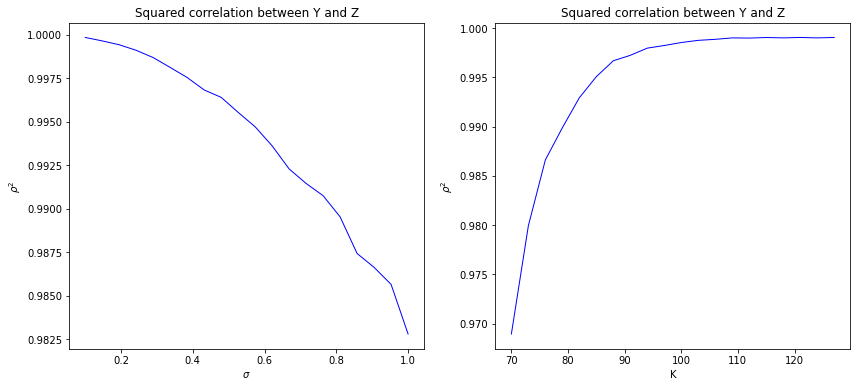

In [18]:
vol_vector = np.linspace(0.1, 1, 20) # volatility vector
strike_vector = np.arange(70, 130, 3) # strike price vector

# obtaining squared correlation measure
corr_sigma = np.zeros(len(vol_vector))
corr_strike = np.zeros(len(strike_vector))
for i in range(len(vol_vector)):
    corr_sigma[i] = corrZY(rng, s0, r, vol_vector[i], T, k, samplesize, m)
    corr_strike[i] = corrZY(rng, s0, r, sigma, T, strike_vector[i], samplesize, m)

# Plotting sample squared correlation against different strike price and volatility    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (14,6))
ax1.plot(vol_vector, corr_sigma, lw=1, c="blue")
ax1.set_ylabel(r"$\rho^2$")
ax1.set_xlabel(r"$\sigma$")
ax1.set_title("Squared correlation between Y and Z")
ax2.plot(strike_vector, corr_strike, lw=1, c="blue")
ax2.set_ylabel(r"$\rho^2$")
ax2.set_xlabel("K")
ax2.set_title("Squared correlation between Y and Z")
plt.show()

As expected, we can see a slight decrease in $\rho_{YZ}^{2}$ as the volatility increases and a slight increase in $\rho_{YZ}^{2}$ as the strike price increases. However, we can see that $\rho_{YZ}^{2}$ remains significantly high, around 96%, and thus those changes are negligible. We can conclude that using Z as control variate for estimating the time-0 price of an Asian put option may significantly reduce the variance of the standard Monte Carlo estimator by around 96% for different volatility parameters and strike prices. This reduction in the variance of our estimator will imply a lower standard error and a narrower confidence interval for our estimator, and hence a more precise price of our Asian put option. Therefore, in a world where $E[Z]$ can be computed analytically, $Z$ is a suitable controle for estimating the time-0 price of the given option. <br> 

## Problem 4

## Finite Difference Scheme for Ordinary Differential equation (ODE) 

We consider the problem of implementing a forward finite difference scheme for approximating the solution of the ODE given below.

Consider the ODE
\begin{align*}
	u'(t) = u(t) + 5t - 10, \quad \forall t \in \left(0,2\right] \quad (1) \\
\end{align*}
\begin{align*}
	u(0) = 8 \\
\end{align*}
where $u:\left[0,2\right] \to\mathbb R$.

### I) Solving the ODE analytically

The ODE in (1) can be written as follow

\begin{align*}
	u'(t) + p(t) u(t) = q(t) \quad (2)
\end{align*}
where $p(t) = -1 \text{ and } q(t) = 5t -10$. 

From its form, we can deduce that it is a first order linear ODE, which can be solved by first finding the integrator factor and then by integrating the result. <br>
Our integrator factor is such that $I(t)p(t) = I'(t)$  and is given by

\begin{equation} I(t) = e^{\int p(t) dt} = e^{\int -1 dt} = e^{-t} \quad (3) \end{equation}

Now by multiplying both sides of equation (2) by (3) we get

\begin{equation} u'(t)I(t) + u(t)I'(t) = q(t)I(t) \quad \Rightarrow \quad [e^{-t}u(t)]' = (5t -10)e^{-t} \quad (4) \end{equation}

By integrating both sides of equation (4), we obtain

\begin{equation} e^{-t}u(t) = 5e^{-t}(1-t) + C \quad \Rightarrow \quad u(t) = Ce^{t} -5t +5 \end{equation}

along with the condition $u(0) = 8$, we finally obtain

\begin{equation} u(0) = C + 5 = 8 \quad \Rightarrow \quad C = 3 \quad \Rightarrow \quad u(t) = 3e^{t} -5t +5 \quad (5) \end{equation}

As we can see, result (5) solves the given ODE (1). Therefore, we can safely implement a forward finite difference scheme for approximating the ODE (1) and compare our approximation with its analytical solution.

### II) Deriving an explicit finite diffrence scheme
We first start by discretising the time $t$ variable to obtain a one-dimensional grid. We consider the time interval $[0,2]$ and given a strictly positive integer $n$, we define $\Delta t = \frac{2}{n} > 0 $, and we use $n + 1$ points in time

\begin{equation} 0 = t_{0} < t_{1} < ... < t_{n} = 2 \end{equation}

where 

\begin{equation} t_{\ell} = \ell \Delta t, \text{ for } \ell = \{0, 1\dots\, n\}. \end{equation}

Given this grid, the function $u$ in (1) can be written

\begin{equation} u_{\ell} = u(t_{\ell}), \text{ for } \ell = \{0, 1\dots\, n\}. \end{equation}

The explicit finite difference scheme will use a forward scheme for the first derivative with respect to time to approximate the solution of the ODE given in (1). We approximate the derivative in equation (1) to obtain

\begin{equation} \frac{u_{\ell +1} - u_{\ell}}{\Delta t} + O(\Delta t) = u_{\ell} + 5\ell - 10 \end{equation}

By ignoring the error term and re-arranging the equation, the explicit finite difference scheme is given by the following scheme

\begin{equation} u_{\ell +1} = u_{\ell} + \Delta t (u_{\ell} + 5\ell - 10), \quad \text{ for } 
\ell = \{0, 1\dots\, n\}  \quad (6)
\end{equation}

where $u_{0} = u(0) = 8$.

#### Implementing the scheme in Python
The function below implements the explicit finite difference scheme (6) over the discretised time grid for a specified number of points. It may also return a specific time point estimate by modifying the "whicht" argument which has None as default value.

In [19]:
def forward_ode(numberofpoints, whicht = None):
    """Function that returns a vector of approximated solution of the ODE (1) along with its associated discretized
    time-space. May return a point approximation by modifying whicht parameter."""
    deltat = 2/numberofpoints # determine stepsize 
    timepoints = np.arange(start = 0, stop =  numberofpoints + 1)*deltat # discretizing time space
    u_hat = None # point estimate
    allvalues = np.zeros(numberofpoints+1) # initialize vector that will contain ODE solutions
    allvalues[0] = 8 # initialize first element by u(0)
    for i in range(1,numberofpoints+1): # recursively obtaining the ODE solution
        allvalues[i] = deltat*(allvalues[i-1] + 5*timepoints[i] - 10) + allvalues[i-1]
        if timepoints[i] == whicht: # finding specified timepoint on the grid
            u_hat = allvalues[i] 
    return timepoints, allvalues, u_hat

### III) Comparing ODE approximation with analytical result
The function below return the analytical ODE solution for a specified $t$ parameter.

In [20]:
def ode_sol(t):
    """Returns analytical ODE solution evaluated at t."""
    result = 3 * np.exp(t) - 5 * t + 5
    return result

#### Graphically

To asses graphically how precise is our finite difference scheme, we can plot our approximation of $u$ as a function of $t$, as well as, the analytical solution given by (5). Since the precision of our approximated solutions seem to be heavily dependent on the number of grid points used, we will approximate the ODE given in (1) using two schemes, one with $10+1$ and one with $100+1$ grid points and compare them respectively to the analytical solution given in (5).

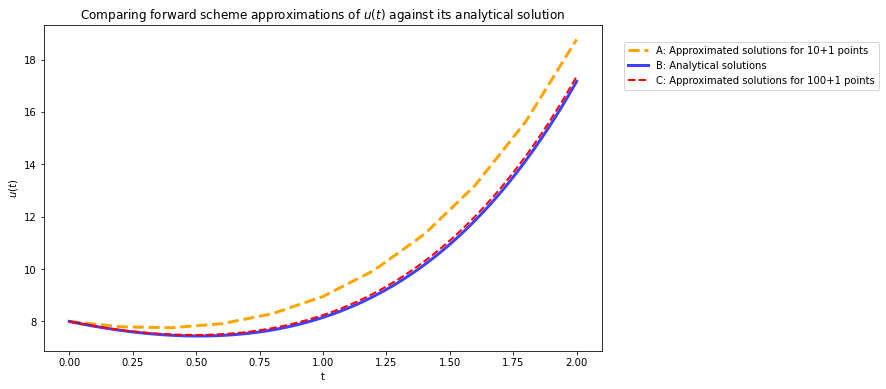

In [21]:
# Plotting the ODE approximated solution against analytical solution
low_n_appr = forward_ode(10) # scheme with 11 grid points
high_n_appr = forward_ode(100) # scheme with 101 grid points
low_n_sol = ode_sol(low_n_appr[0]) # associated ODE solution 
high_n_sol = ode_sol(high_n_appr[0])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,6))
ax.plot(low_n_appr[0], low_n_appr[1], lw=3, c="orange", label="A: Approximated solutions for 10+1 points", 
        linestyle = "dashed")
ax.plot(high_n_appr[0], high_n_sol, lw=3, c="blue", label="B: Analytical solutions", alpha=0.75)
ax.plot(high_n_appr[0], high_n_appr[1], lw=2, c="red", label="C: Approximated solutions for 100+1 points", 
        linestyle = "dashed")

ax.set_ylabel(r"$u(t)$")
ax.set_xlabel("t")
ax.set_title("Comparing forward scheme approximations of $u(t)$ against its analytical solution")
ax.legend(loc=(1.04,0.8))
plt.show()

First, we can notice a significant difference of fit when using 10+1 against 100+1 grid points. Indeed, from $t = 0$ to $t = 0.5$, the curves A and C are pretty close to each other and to curve B, which represents the ODE analytical solution. However, as t increases, the curve A strongly deviates from curve B and C while curve C slightly deviates from curve B. This indicates that the number of grid points used to approximate the ODE plays indeed a major role in our estimations' precision. Indeed, curve A is almost always situated above curve B, while curve C is very close to curve B. This suggests that the finite difference scheme with 10+1 grid points seems to systematically overestimate the ODE solutions and seems to perform poorly compared to the finite difference scheme with 100+1 grid points. Indeed, graphically, the finite difference scheme with 100+1 grid points looks to perform well, despite the slight deviation for $t > 1$.

Secondly, we can observe that the respective gap between curves A and C with curve B appear to be linearly increasing over time. We can verify this claim by plotting the absolute error over time for the two finite difference scheme.

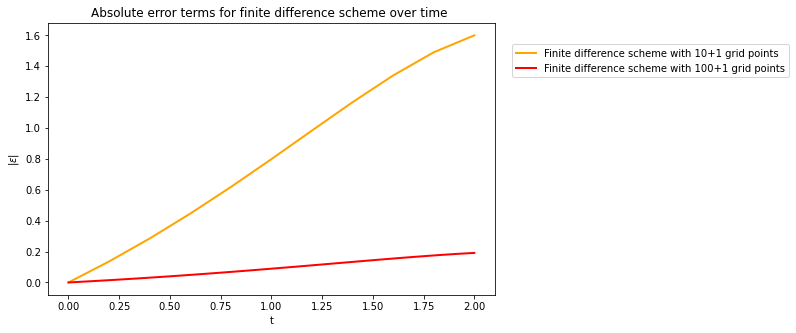

In [22]:
# Pbtaining absolute error for the two schemes
abs_error_low_n = np.absolute(low_n_appr[1] - low_n_sol) 
abs_error_high_n = np.absolute(high_n_appr[1] - high_n_sol)

# Plotting absolute error over time for the two schemes
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,5))
ax.plot(low_n_appr[0], abs_error_low_n, lw=2, c="orange", label="Finite difference scheme with 10+1 grid points")
ax.plot(high_n_appr[0], abs_error_high_n, lw=2, c="red", label="Finite difference scheme with 100+1 grid points")
ax.set_ylabel(r"$|\epsilon|$")
ax.set_xlabel("t")
ax.set_title("Absolute error terms for finite difference scheme over time ")
ax.legend(loc=(1.04,0.8))
plt.show()

By plotting the absolute error terms over time for the two finite difference schemes, we obtain two straight lines. This confirms our observation made earlier and can be explained by the fact that the order of convergence of the explicit scheme is $O(\Delta t)$.

#### Algebraically

Moreover, we can also try to assess the performance of our finite difference scheme algebraically by using measures such as the Mean Absolute Percentage Error (MAPE) which expresses accuracy as a percentage of error. It is defined as follow

\begin{equation} M =   \sum_{\ell=1}^{n} \left|\frac{u_{\ell}-\hat{u}_{\ell}}{u_{\ell}}\right| 
\end{equation}

where $u_{\ell}$ is the analytical solution of the ODE at time $i$ and $\hat{u}_{\ell}$ is its estimated value.

In [23]:
def mape(u, u_hat, rounding=2):
    "Function that takes two vectors as argument and returns their associated MAPE with default rounding of 2."
    abs_sum = np.sum(np.absolute(u - u_hat))
    mape = round(abs_sum*100/np.sum(u), rounding)
    return mape

In [24]:
mape_low_n = mape(low_n_sol, low_n_appr[1])
mape_high_n = mape(high_n_sol, high_n_appr[1])

print("MAPE for 10+1 grid points: {}%".format(mape_low_n))
print("MAPE for 100+1 grid points: {}%".format(mape_high_n))

MAPE for 10+1 grid points: 8.15%
MAPE for 100+1 grid points: 0.96%


We can clearly see that our percentage error has been strongly decreased by approximately a factor of 8, when using 10 times more grid points. Hence, we can conclude that our explicit finite difference scheme seems to perform well for estimating the ODE solution given in (1) for a number of grid points larger than 100. Indeed, for 100 grid points, we obtain a percentage error below 1%.

### IV) Point approximation with fixed error level
If we would like to perform a point approximation of the ODE (1) given a fixed error level, we can try to create a function that recursively increase the number of grid points used until finding an absolute error that satisfies the given condition. The function below is an implementation of this strategy and takes as argument the time point at which we would like to estimate the ODE solution, the fixed error level and the starting number of grid points (greater than 10). It outputs the required number of points and the absolute error of the estimation.

In [25]:
def which_n(whicht, epsilon, n0=10):
    """Returns the number of required grid points for achieving an approximation of the ODE solution at a given time t
    with a fixed error level."""
    n = int(n0/10) 
    u = 3*np.exp(whicht) -5*whicht +5 # analytical solution
    u_hat = 0 # initializing estimate
    
    while np.absolute(u-u_hat) > epsilon: # while error level not attained, repeat operation
        n *= 10 # tested number of grid points multiplied 10 at each iteration
        deltat = 2/n # stepsize
        allvalues = np.zeros(n+1) # vector of approximated ODE solutions 
        allvalues[0] = 8 # initializing vector
        timepoints = np.arange(start = 0, stop =  n+1) * deltat
        
        for i in range(1,n+1):  # starting approximation for n grid points
            allvalues[i] = deltat*(allvalues[i-1] + 5*timepoints[i] - 10) + allvalues[i-1]
            if timepoints[i] == whicht: # approximation found at given time
                print("Performed approximation for {} number of points.".format(n))
                u_hat = allvalues[i] # update estimation
                break 
                
    return n, np.absolute(u-u_hat)        

Let's find an $n \in \mathbb{N}$ such that $|u(1.77) - \hat{u}_{n}(1.77)| \leq 0.001 \quad (7)$

In [26]:
n_est = which_n(1.77, 0.001, 10)
print("-------")
print("\nRequired number of points: {}".format(n_est[0]))

Performed approximation for 1000 number of points.
Performed approximation for 10000 number of points.
Performed approximation for 1000000 number of points.
-------

Required number of points: 1000000


We need one million grid points to obtain an error below 0.001. However, this number is quite large, and if we have a closer look, we can see that for 100 and 100000 grid points, the algortihm didn't generate an approximation at time $t = 1.77$. For 100 grid points, we can see that $\ell = \frac{1.77*100}{2} = 88.5$ is not an integer, and as a result, we don't have an approximation for $t =1.77$. However, for 100000 points, $\ell = \frac{1.77*100000}{2} = 88500$ is an integer, and, therefore, we should obtain an exact value at time 1.77. 

I believe that this result is caused by some rounding errors arising from the imperfect representation of floating point numbers in the computer. Indeed, when discretizing the time space for extremely small $\Delta t$, the stepsize is not exactly equal to $2/100000 = 2*10^{-5}$. We can check that using the following code:

In [27]:
timepoint = forward_ode(100000)[0] # ode approximation for 100000 grid points

# Computing step size at different time points
computed_stepsize_1 = timepoint[1] - timepoint[0]
computed_stepsize_2 = timepoint[88500] - timepoint[88499]

print("Stepsize between time 1 and 2: {}".format(computed_stepsize_1))
print("Stepsize between time 88499 and 88500: {}".format(computed_stepsize_2))

Stepsize between time 1 and 2: 2e-05
Stepsize between time 88499 and 88500: 2.0000000000131024e-05


As we can see, the step size is not exactly equal to $2*10^{-5}$. However, by modifying the initial number of points from which the algortihm starts, we can arrive at a much lower number of required points.

In [28]:
n_est_lower = which_n(1.77, 0.001, 40) # 40 staring grid points
print("\nRequired number of points: {}".format(n_est_lower[0]))

Performed approximation for 400 number of points.
Performed approximation for 4000 number of points.
Performed approximation for 40000 number of points.

Required number of points: 40000


Hence, we see that 40000 grid points can satisfy condition (7), and this can be verified using our forward_ode function.

In [29]:
point_est = forward_ode(40000, 1.77)[2]
point_sol = ode_sol(1.77)
print(round(np.abs(point_est - point_sol),4))

0.0004
